# Importing Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
cars=pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


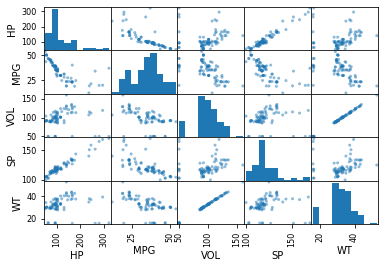

In [7]:
pd.plotting.scatter_matrix(cars)
plt.show()

# Preparing a model

In [8]:
from statsmodels.formula.api import ols

In [10]:
model=ols('MPG~VOL',data=cars).fit().summary()
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           3.82e-07
Time:                        16:29:08   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model=ols('MPG~WT',data=cars).fit().summary()
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           4.38e-07
Time:                        16:30:45   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# SLR Models

# Correlation matrix

In [12]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Calculating VIF

<img src='https://miro.medium.com/freeze/max/385/1*lPyHIl8GlYoyfAd7ntAnnw.gif'>

In [15]:
m_vol=ols('VOL~SP+HP+WT',data=cars).fit()

In [17]:
1/(1-m_vol.rsquared)

638.8060836592878

In [18]:
m_vol1=ols('SP~VOL+HP+WT',data=cars).fit()
1/(1-m_vol1.rsquared)

20.00763878305008

In [19]:
m_vol2=ols('WT~SP+VOL+HP',data=cars).fit()
1/(1-m_vol2.rsquared)

639.5338175572624

In [20]:
m_vol3=ols('HP~WT+SP+VOL',data=cars).fit()
1/(1-m_vol3.rsquared)

19.926588974998563

# Subset Selection

In [24]:
VOL=ols('MPG~VOL+SP+HP',data=cars).fit()
f'AIC:{VOL.aic},R2:{VOL.rsquared}'

'AIC:475.9875158854609,R2:0.770368341321302'

In [26]:
WT=ols('MPG~WT+SP+HP',data=cars).fit()
f'AIC:{WT.aic},R2:{VOL.rsquared}'

'AIC:476.29927501529767,R2:0.769482813998346'

<img src='https://www.gstatic.com/education/formulas2/472522532/en/akaike_information_criterion.svg'>

# Residual Analysis

## Test For Normality QQ-Plot

In [28]:
import statsmodels.api as sm

In [35]:
model=ols('MPG~VOL+SP+HP+WT',data=cars).fit()

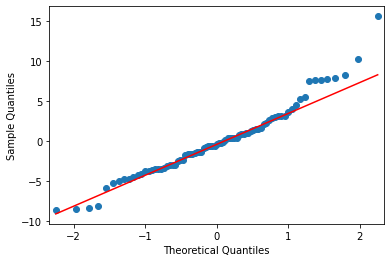

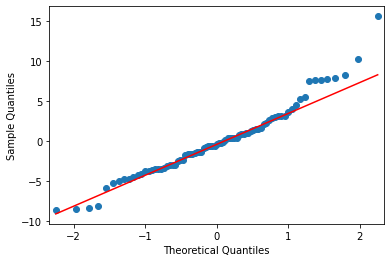

In [37]:
sm.qqplot(model.resid,line='q')

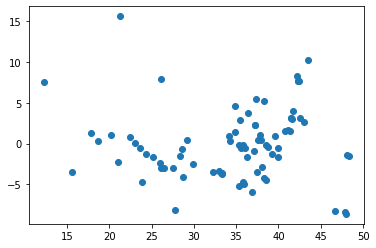

In [39]:
plt.scatter(model.fittedvalues,model.resid)
plt.show()

## Residual Plot for Homoscedasticity

## Residual Vs Regressors

# Model Deletion Diagnostics


## Detecting Influencers/Outliers

## Cook’s Distance

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

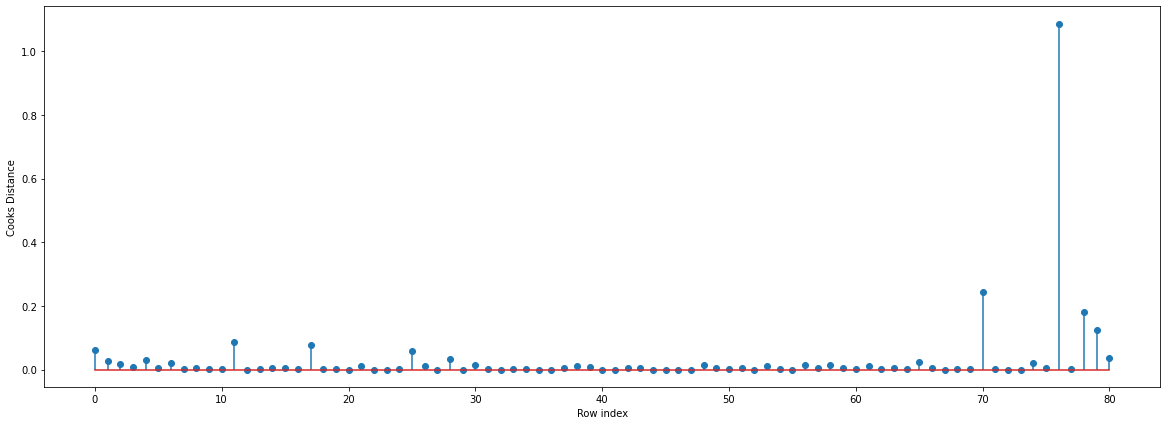

In [45]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## High Influence points

In [46]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.2222222222222222

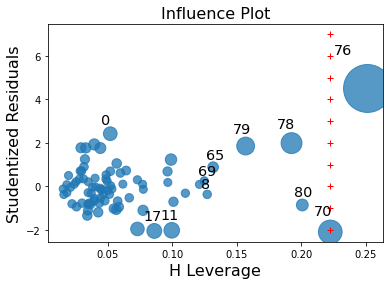

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

# Improving the model

In [48]:
df=cars.copy()

In [50]:
df.drop([70,76],inplace=True)

In [52]:
df.shape

(79, 5)

# Build Model

# Cook’s Distance

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## Influence Points

In [ ]:
# 3*(k+1)/n
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [ ]:
data[data.index.isin([70, 76])]

## Predicting for new data